In [1]:
import pandas as pd
import numpy as np

import gc

%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

In [2]:
airports_data = pd.read_csv('Lookup Tables/L_AIRPORT_ID.csv', index_col='Code')
carriers_data = pd.read_csv('Lookup Tables/L_CARRIER_HISTORY.csv', index_col='Code')

In [3]:
airports_data = airports_data.rename(index=str, columns={'Description': 'AIRPORT_NAME'})
print(airports_data.shape)
airports_data.head()

(6361, 1)


,AIRPORT_NAME
Code,
10001,"Afognak Lake, AK: Afognak Lake Airport"
10003,"Granite Mountain, AK: Bear Creek Mining Strip"
10004,"Lik, AK: Lik Mining Camp"
10005,"Little Squaw, AK: Little Squaw Airport"
10006,"Kizhuyak, AK: Kizhuyak Bay"


In [4]:
carriers_data = carriers_data.rename(index=str, columns={'Description': 'CARRIER_NAME'})
print(carriers_data.shape)
carriers_data.head()

(1846, 1)


,CARRIER_NAME
Code,
02Q,Titan Airways (2006 - )
04Q,Tradewind Aviation (2006 - )
05Q,"Comlux Aviation, AG (2006 - 2012)"
06Q,Master Top Linhas Aereas Ltd. (2007 - )
07Q,Flair Airlines Ltd. (2007 - )


In [5]:
readme = pd.read_csv('Monthly Data/ReadMe.csv')
pd.set_option('max_colwidth', -1)
readme

,SYS_FIELD_NAME,FIELD_DESC,Unnamed: 2
0,FL_DATE,Flight Date (yyyymmdd),NaN
1,UNIQUE_CARRIER,"Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.",NaN
2,AIRLINE_ID,"An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.",NaN
3,CARRIER,"Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.",NaN
4,TAIL_NUM,Tail Number,NaN
5,FL_NUM,Flight Number,NaN
6,ORIGIN_AIRPORT_ID,"Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.",NaN
7,ORIGIN_AIRPORT_SEQ_ID,"Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.",NaN
8,ORIGIN_CITY_MARKET_ID,"Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.",NaN
9,ORIGIN,Origin Airport,NaN


In [6]:
monthly = [pd.read_csv('Monthly Data/{}.csv'.format(i), parse_dates=['FL_DATE'], infer_datetime_format=True) 
           for i in range(1,13)]

In [7]:
df = pd.concat(monthly, axis=0)
df.drop(labels='Unnamed: 50', axis=1, inplace=True)
del monthly; gc.collect();
print(df.shape)
df.head()

(5819811, 50)


,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,...,0.0,1300-1359,0.0,0.0,85.0,78.0,57.0,1.0,328.0,2
1,2014-01-01,AA,19805,AA,N3FXAA,2378,13303,1330303,32467,MIA,...,-1.0,2300-2359,0.0,0.0,60.0,55.0,37.0,1.0,204.0,1
2,2014-01-01,EV,20366,EV,N906EV,2500,11298,1129803,30194,DFW,...,NaN,2200-2259,1.0,0.0,60.0,NaN,NaN,1.0,247.0,1
3,2014-01-01,EV,20366,EV,N903EV,2502,11146,1114603,31146,CRW,...,4.0,1900-1959,0.0,0.0,185.0,180.0,150.0,1.0,946.0,4
4,2014-01-01,EV,20366,EV,N903EV,2502,11298,1129803,30194,DFW,...,4.0,1600-1659,0.0,0.0,125.0,115.0,101.0,1.0,946.0,4


In [8]:
df = pd.merge(df, carriers_data, left_on='UNIQUE_CARRIER', right_index=True, how='left')
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_NAME
0,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,...,1300-1359,0.0,0.0,85.0,78.0,57.0,1.0,328.0,2,American Airlines Inc. (1960 - )
1,2014-01-01,AA,19805,AA,N3FXAA,2378,13303,1330303,32467,MIA,...,2300-2359,0.0,0.0,60.0,55.0,37.0,1.0,204.0,1,American Airlines Inc. (1960 - )
2,2014-01-01,EV,20366,EV,N906EV,2500,11298,1129803,30194,DFW,...,2200-2259,1.0,0.0,60.0,NaN,NaN,1.0,247.0,1,ExpressJet Airlines Inc. (2012 - )
2,2014-01-01,EV,20366,EV,N906EV,2500,11298,1129803,30194,DFW,...,2200-2259,1.0,0.0,60.0,NaN,NaN,1.0,247.0,1,Atlantic Southeast Airlines (1993 - 2011)
3,2014-01-01,EV,20366,EV,N903EV,2502,11146,1114603,31146,CRW,...,1900-1959,0.0,0.0,185.0,180.0,150.0,1.0,946.0,4,ExpressJet Airlines Inc. (2012 - )


In [9]:
df.shape

(7842904, 51)

In [10]:
df.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_NAME'],
      dtype='object')

In [11]:
flights_by_route = df[['ORIGIN', 'DEST', 'FLIGHTS']].groupby(['ORIGIN', 'DEST'])['FLIGHTS'].sum().astype('float16')

In [12]:
most_flights_by_route = flights_by_route.sort_values(ascending=False).head(15)
most_flights_by_route.head(15)

ORIGIN  DEST
SFO     LAX     16352.0
LAX     SFO     16344.0
JFK     LAX     14464.0
LAX     JFK     14464.0
DCA     BOS     13344.0
BOS     DCA     13344.0
LAS     LAX     12968.0
LAX     LAS     12672.0
BOS     PHL     11648.0
PHL     BOS     11640.0
CMH     ORD     11544.0
BNA     ORD     11456.0
ORD     CMH     11456.0
        BNA     11416.0
PHX     LAX     11072.0
Name: FLIGHTS, dtype: float16

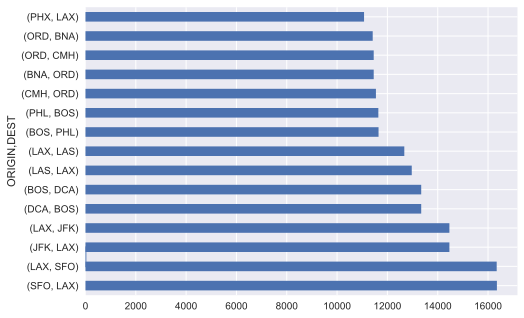

In [13]:
# HERE I INSERT A FANCY PLOT OF THE ABOVE
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.plot([1,2])

most_flights_by_route.plot.barh(ax=ax)
plt.savefig('flown_routes.png', bbox_inches='tight')

In [14]:
all_carriers = df['UNIQUE_CARRIER'].nunique()
print('Number of unique carriers: ', all_carriers)
df['UNIQUE_CARRIER'].value_counts()

Number of unique carriers:  14


EV    1372042
MQ    1178103
WN    1174633
US    829330 
DL    800375 
OO    613030 
AA    537697 
UA    493528 
B6    249693 
AS    160257 
FL    158990 
VX    115020 
F9    85474  
HA    74732  
Name: UNIQUE_CARRIER, dtype: int64

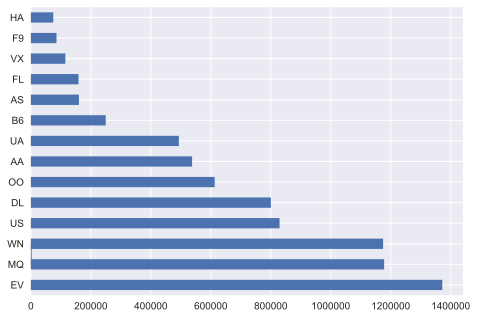

In [15]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.plot([1,2])

df['UNIQUE_CARRIER'].value_counts().plot.barh(ax=ax)
plt.savefig('flights_carrier.png', bbox_inches='tight')

In [16]:
carriers_data.loc['WN']

CARRIER_NAME    Southwest Airlines Co. (1979 - )
Name: WN, dtype: object

In [17]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['dayOfWeek']=df['FL_DATE'].dt.dayofweek.map(dayOfWeek)

In [18]:
flights_by_dayofweek = df.groupby(['dayOfWeek'])['FLIGHTS'].sum().sort_values(ascending=False)
print(flights_by_dayofweek)
print('Second most popular day of week is: ', flights_by_dayofweek.index[1])

dayOfWeek
Monday       1169943.0
Wednesday    1167033.0
Friday       1165301.0
Thursday     1165252.0
Tuesday      1140613.0
Sunday       1102941.0
Saturday     931821.0 
Name: FLIGHTS, dtype: float64
Second most popular day of week is:  Wednesday


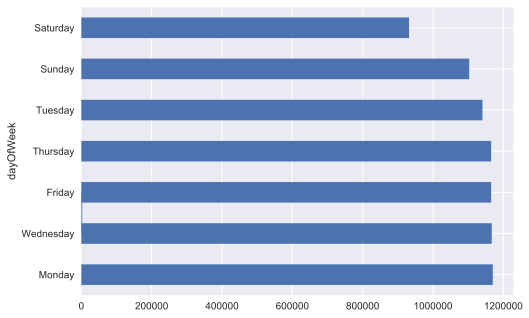

In [19]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.plot([1,2])

flights_by_dayofweek.plot.barh(ax=ax)
plt.savefig('dow.png', bbox_inches='tight')

In [20]:
# top 10 airports buy number of departure delays > 15 min
df.groupby(['ORIGIN_AIRPORT_ID'])['DEP_DEL15'].sum().sort_values(ascending=False).head(10)

ORIGIN_AIRPORT_ID
13930    134571.0
11298    104996.0
10397    97919.0 
11292    65149.0 
12266    57274.0 
12892    50515.0 
14771    42489.0 
14107    41175.0 
11618    37482.0 
11057    37161.0 
Name: DEP_DEL15, dtype: float64

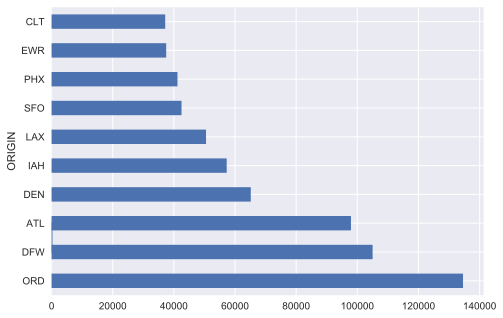

In [21]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.plot([1,2])

df.groupby(['ORIGIN'])['DEP_DEL15'].sum().sort_values(ascending=False).head(10).plot.barh(ax=ax)
plt.savefig('airport_delay_dep.png', bbox_inches='tight')

In [22]:
airports_data.loc['11057']

AIRPORT_NAME    Charlotte, NC: Charlotte Douglas International
Name: 11057, dtype: object

In [23]:
# top 10 airports buy number of arrival delays > 15 min
df.groupby(['DEST_AIRPORT_ID'])['ARR_DEL15'].sum().sort_values(ascending=False).head(10)

DEST_AIRPORT_ID
13930    136263.0
11298    103806.0
10397    85024.0 
12266    54680.0 
11292    54639.0 
12892    53637.0 
14771    52283.0 
12953    40404.0 
11618    38844.0 
14107    36538.0 
Name: ARR_DEL15, dtype: float64

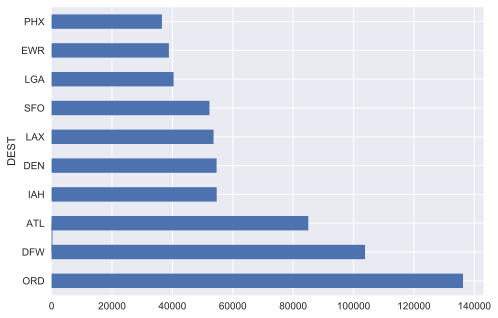

In [24]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.plot([1,2])

df.groupby(['DEST'])['ARR_DEL15'].sum().sort_values(ascending=False).head(10).plot.barh(ax=ax)
plt.savefig('airport_delay_arr.png', bbox_inches='tight')

In [25]:
airports_data.loc['14107',:]

AIRPORT_NAME    Phoenix, AZ: Phoenix Sky Harbor International
Name: 14107, dtype: object

In [26]:
df['MONTH'] = df['FL_DATE'].dt.month

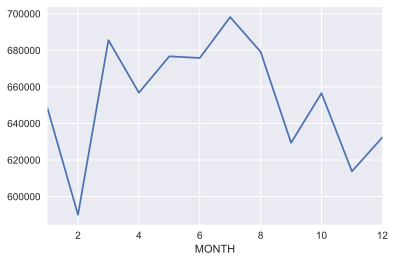

In [27]:
df.groupby(['MONTH'])['FLIGHTS'].sum().plot()

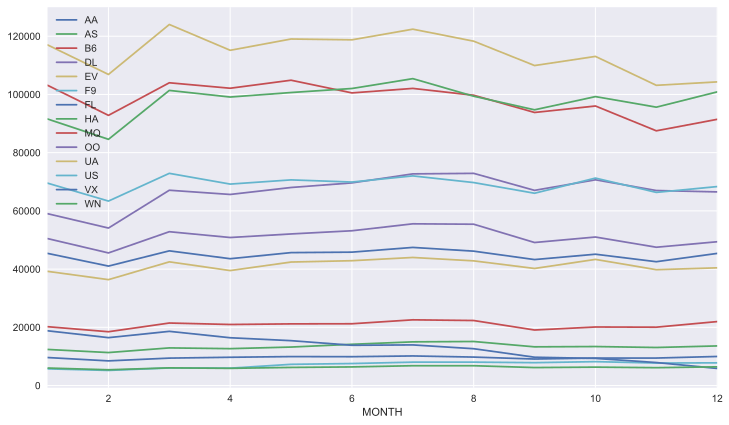

In [28]:
fig, ax = plt.subplots(figsize=(12,7))
monthly_flights = df.groupby(['MONTH', 'UNIQUE_CARRIER'])[['FLIGHTS']].sum().unstack()
for carrier, data in monthly_flights.iteritems():
    data.rename(carrier[1]).plot(ax=ax, legend=True)

In [29]:
def plot_carriers(carriers):
    fig, ax = plt.subplots(figsize=(12,7))
    for carrier, data in monthly_flights[[('FLIGHTS', x) for x in carriers]].iteritems():
        data.rename(carrier[1]).plot(ax=ax, legend=True)
    plt.savefig("".join(carriers) +'.png', bbox_inches='tight')

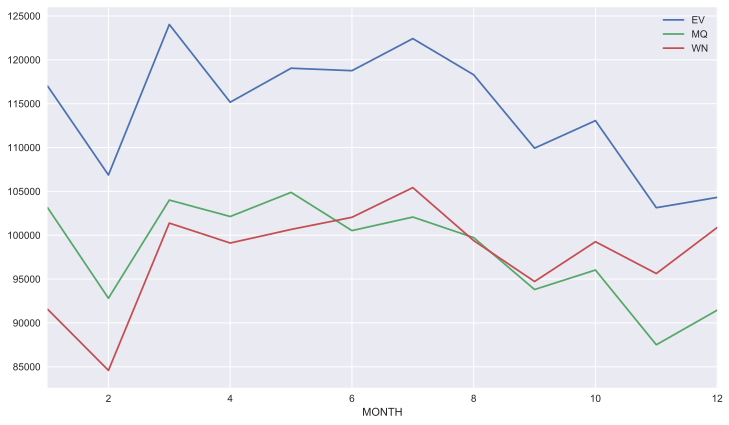

In [30]:
#fig, ax = plt.subplots(figsize=(12,7))
#for carrier, data in monthly_flights[[('FLIGHTS','EV'), ('FLIGHTS','MQ'), ('FLIGHTS','WN')]].iteritems():
#    data.rename(carrier[1]).plot(ax=ax, legend=True)
plot_carriers(['EV', 'MQ', 'WN'])

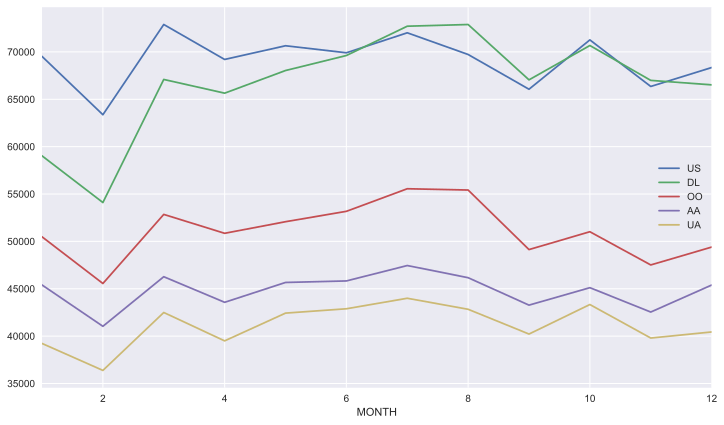

In [31]:
plot_carriers(['US', 'DL', 'OO', 'AA', 'UA'])

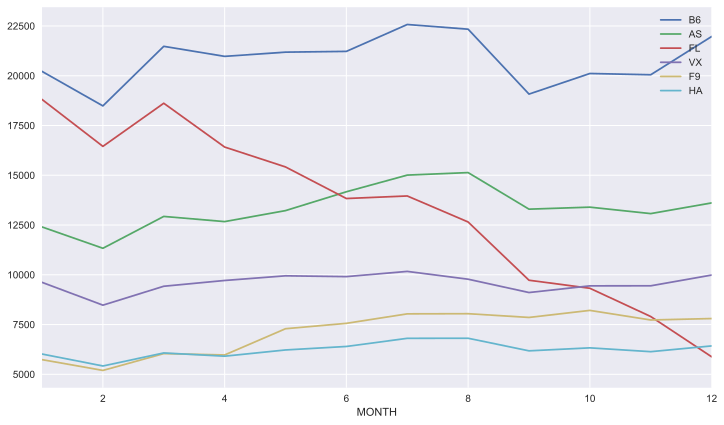

In [32]:
plot_carriers(['B6', 'AS', 'FL', 'VX', 'F9', 'HA'])

In [33]:
print(carriers_data.loc['FL'])

                                   CARRIER_NAME
Code                                           
FL    AirTran Airways Corporation (1994 - 2014)
FL    Frontier Airlines Inc. (1960 - 1986)     


In [34]:
#AirTran Airways ceased operations in Dec 2014, acquired by Southwest Airlines